# Binarize this image so that only three filtered numbers remain.

(Hint: Using GaussianBlur with a large filter size is essential for noise removal.)

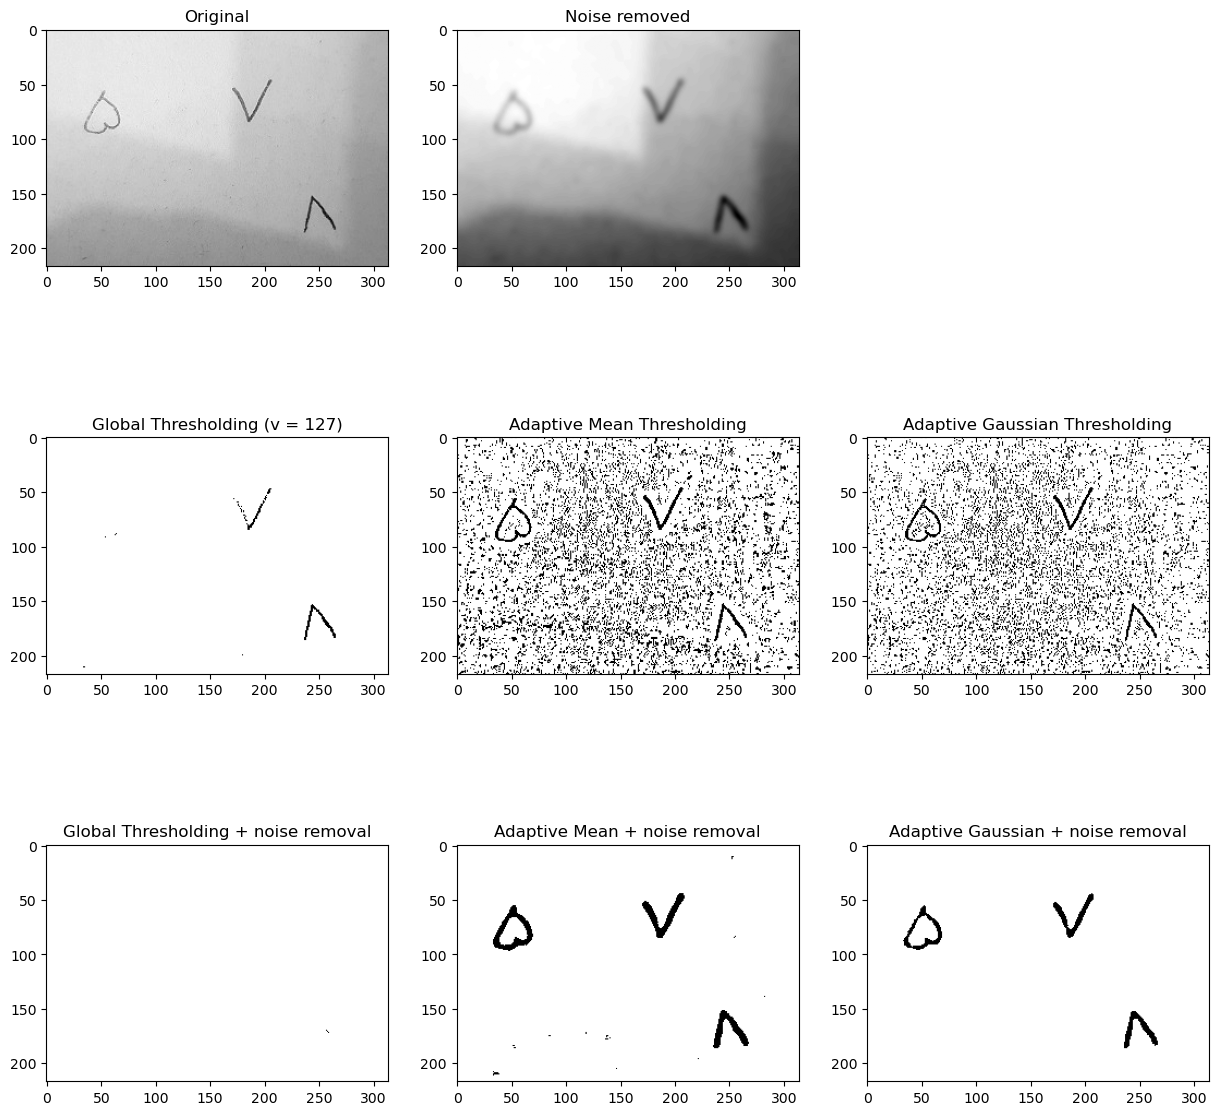

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# بارگذاری تصویر جدید
original_image = cv2.imread(r'D:\exam\test\adad.jpg', 0)

# حذف نویز
noise_removed_image = cv2.GaussianBlur(original_image, (15, 15), 0)  # فیلتر بزرگ‌تر شده است

# اعمال آستانه‌گذاری
_, output1 = cv2.threshold(original_image, 127, 255, cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output3 = cv2.adaptiveThreshold(original_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

_, output4 = cv2.threshold(noise_removed_image, 127, 255, cv2.THRESH_BINARY)
output5 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output6 = cv2.adaptiveThreshold(noise_removed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# نمایش تصاویر
plt.figure(figsize=[15, 15])
plt.subplot(331); plt.imshow(original_image, cmap='gray'); plt.title("Original");
plt.subplot(332); plt.imshow(noise_removed_image, cmap='gray'); plt.title("Noise removed");

plt.subplot(334); plt.imshow(output1, cmap='gray'); plt.title("Global Thresholding (v = 127)");
plt.subplot(335); plt.imshow(output2, cmap='gray'); plt.title("Adaptive Mean Thresholding");
plt.subplot(336); plt.imshow(output3, cmap='gray'); plt.title("Adaptive Gaussian Thresholding");

plt.subplot(337); plt.imshow(output4, cmap='gray'); plt.title("Global Thresholding + noise removal");
plt.subplot(338); plt.imshow(output5, cmap='gray'); plt.title("Adaptive Mean + noise removal");
plt.subplot(339); plt.imshow(output6, cmap='gray'); plt.title("Adaptive Gaussian + noise removal");
# ذخیره تصویر مورد نظر برای استفاده بعدی
cv2.imwrite('temp_output6.jpg', output6)
cv2.imwrite('temp_output3.jpg', output3)
plt.show()


## 🧠 Exercise 9: Connected Component Analysis

Following the previous exercise, **count the number of connected components** and **print the number of digits** on the paper.

> 💡 **Hint**:  
> Obviously, these 3 numbers must be **white** and the background must be **black** in order to count the connected components.


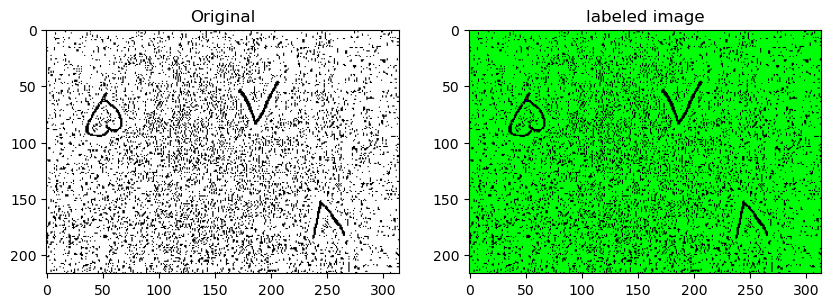

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('temp_output3.jpg', 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
num_labels, labels = cv2.connectedComponents(img)

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank = np.ones_like(img) * 255
labeled_img = cv2.merge([label_hue, blank, blank])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0


plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(122);plt.imshow(labeled_img, cmap='gray');plt.title("labeled image");

In [50]:
np.max(labels)

3

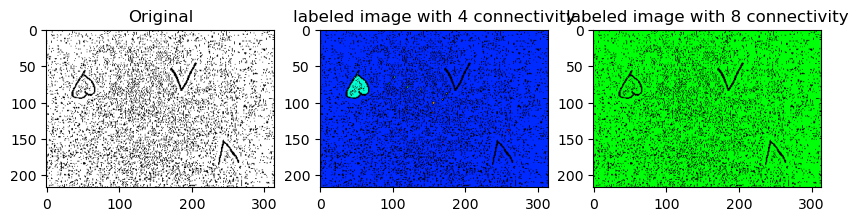

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('temp_output3.jpg', 0)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, labels_with_4_connectivity = cv2.connectedComponents(img, connectivity=4)
_, labels_with_8_connectivity = cv2.connectedComponents(img, connectivity=8)

label_hue4 = np.uint8(179*labels_with_4_connectivity/np.max(labels_with_4_connectivity))
label_hue8 = np.uint8(179*labels_with_8_connectivity/np.max(labels_with_8_connectivity))

blank = np.ones_like(img) * 255
labeled_img4 = cv2.merge([label_hue4, blank, blank])
labeled_img8 = cv2.merge([label_hue8, blank, blank])

# Converting cvt to BGR
labeled_img4 = cv2.cvtColor(labeled_img4, cv2.COLOR_HSV2BGR)
labeled_img8 = cv2.cvtColor(labeled_img8, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img4[label_hue4==0] = 0
labeled_img8[label_hue8==0] = 0

plt.figure(figsize=[10,8])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Original");
plt.subplot(132);plt.imshow(labeled_img4, cmap='gray');plt.title("labeled image with 4 connectivity");
plt.subplot(133);plt.imshow(labeled_img8, cmap='gray');plt.title("labeled image with 8 connectivity");

In [52]:
labels_with_4_connectivity

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [53]:
labels_with_8_connectivity

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

تعداد ارقام شناسایی‌شده: 3


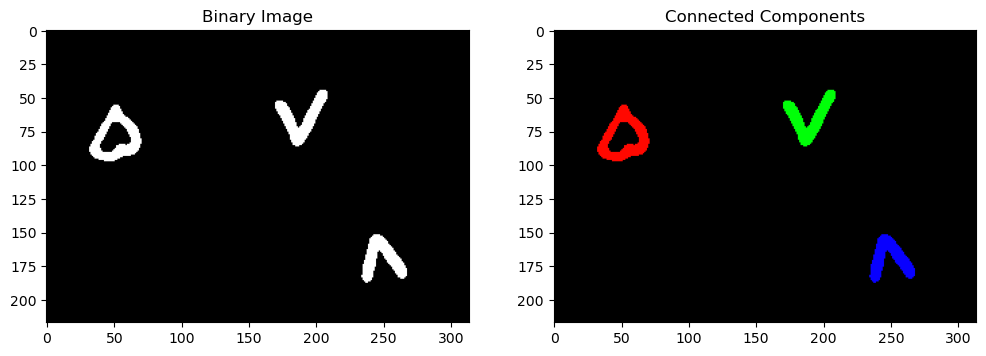

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# مرحله ۱: خواندن تصویر و تبدیل به خاکستری
image = cv2.imread('temp_output6.jpg', 0)

# مرحله ۲: حذف نویز با فیلتر Gaussian بزرگ
blurred = cv2.GaussianBlur(image, (15, 15), 0)

# مرحله ۳: آستانه‌گذاری برای سفید شدن عددها و سیاه شدن زمینه
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# معکوس کردن تصویر (اگر عددها سیاه بودند)
binary = cv2.bitwise_not(binary)

# مرحله ۴: تحلیل مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(binary)

# چاپ تعداد ارقام (تعداد مؤلفه‌ها منهای ۱ چون پس‌زمینه هم یک لیبل دارد)
print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# مرحله ۵: تصویر رنگی برای نمایش مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0  # پس‌زمینه سیاه

# نمایش تصویر
plt.figure(figsize=(12, 6))
plt.subplot(121); plt.imshow(binary, cmap='gray'); plt.title("Binary Image")
plt.subplot(122); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()


تعداد ارقام شناسایی‌شده: 3


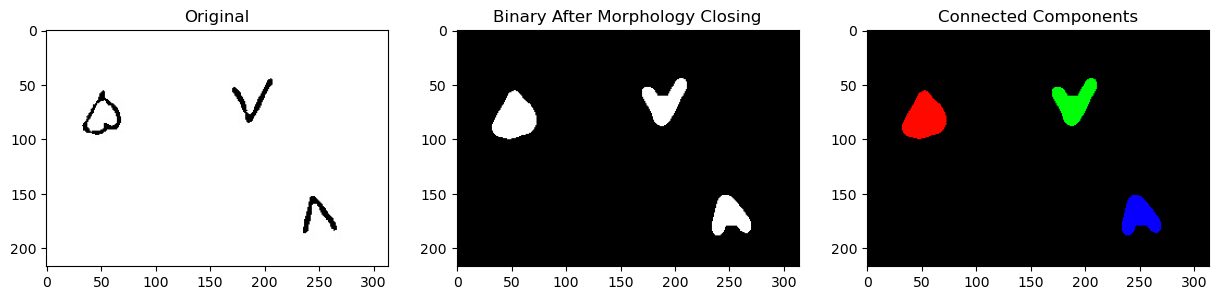

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# خواندن تصویر
image = cv2.imread('temp_output6.jpg', 0)

# فیلتر Gaussian برای حذف نویز
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# آستانه‌گذاری خودکار (Otsu) + معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# اعمال عملیات morphological closing برای اتصال ارقام و حذف نویز
kernel = np.ones((10, 10), np.uint8)  # اندازه کرنل بزرگتر
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# نمایش رنگی مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Binary After Morphology Closing")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()


تعداد ارقام شناسایی‌شده: 3


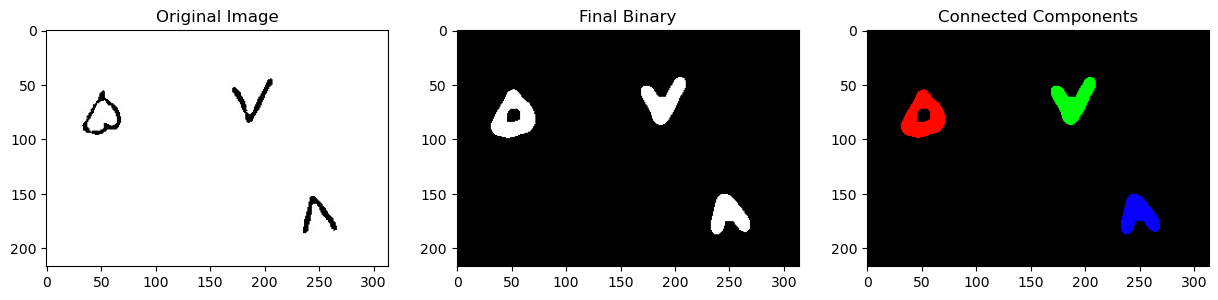

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. خواندن تصویر
image = cv2.imread('temp_output6.jpg', 0)

# 2. حذف نویز با Gaussian Blur بزرگ
blurred = cv2.GaussianBlur(image, (25, 25), 0)

# 3. آستانه‌گذاری با Otsu و معکوس کردن
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. عملیات morphology برای اتصال قسمت‌های شکسته (closing)
kernel = np.ones((7, 7), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 5. شمارش مؤلفه‌های متصل
num_labels, labels = cv2.connectedComponents(closed)

print("تعداد ارقام شناسایی‌شده:", num_labels - 1)

# 6. ساخت تصویر رنگی برای نمایش مؤلفه‌ها
label_hue = np.uint8(179 * labels / np.max(labels))
blank = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank, blank])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

# 7. نمایش نتایج
plt.figure(figsize=(15, 6))
plt.subplot(131); plt.imshow(image, cmap='gray'); plt.title("Original Image")
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title("Final Binary")
plt.subplot(133); plt.imshow(labeled_img); plt.title("Connected Components")
plt.show()
